In [1]:
import pandas as pd
from nilearn import plotting
from nilearn.glm.second_level import non_parametric_inference
from nilearn.reporting import get_clusters_table
from nilearn import plotting
import numpy as np
import matplotlib.pyplot as plt
from decouple import config

In [ ]:
def create_stats_table(results) -> pd.DataFrame:
    table = get_clusters_table(pval_image, stat_threshold=0.0,
                           cluster_threshold=0.0).set_index('Cluster ID', drop=True)
    table['pval'] = 

In [2]:
path = config('happy')
files = pd.read_csv(f"{path}/1stlevel_location.csv")

In [3]:
an = files[files['t1'].str.contains('sub-G2')]
design_matrix = pd.DataFrame(np.ones(an.shape[0])).rename(columns={0:'intercept'})

In [4]:
hc = files[files['t1'].str.contains('sub-G1')]
design_matrix_hc = pd.DataFrame(np.ones(hc.shape[0])).rename(columns={0:'intercept'})

In [5]:
hc_results = non_parametric_inference(
    hc['t2'].to_list(),
    design_matrix=design_matrix_hc,
    model_intercept=True,
    n_perm=500,  # 500 for the sake of time. Ideally, this should be 10,000.
    two_sided_test=False,
    n_jobs=1,
    threshold=0.001,
)

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/mass_univariate/permuted_least_squares.py:960: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  image.new_img_like(masker.mask_img_, metric_map),
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/masking.py:916: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


In [6]:
an_results = non_parametric_inference(
    an['t2'].to_list(),
    design_matrix=design_matrix,
    model_intercept=True,
    n_perm=500,  # 500 for the sake of time. Ideally, this should be 10,000.
    two_sided_test=False,
    n_jobs=1,
    threshold=0.001,
)


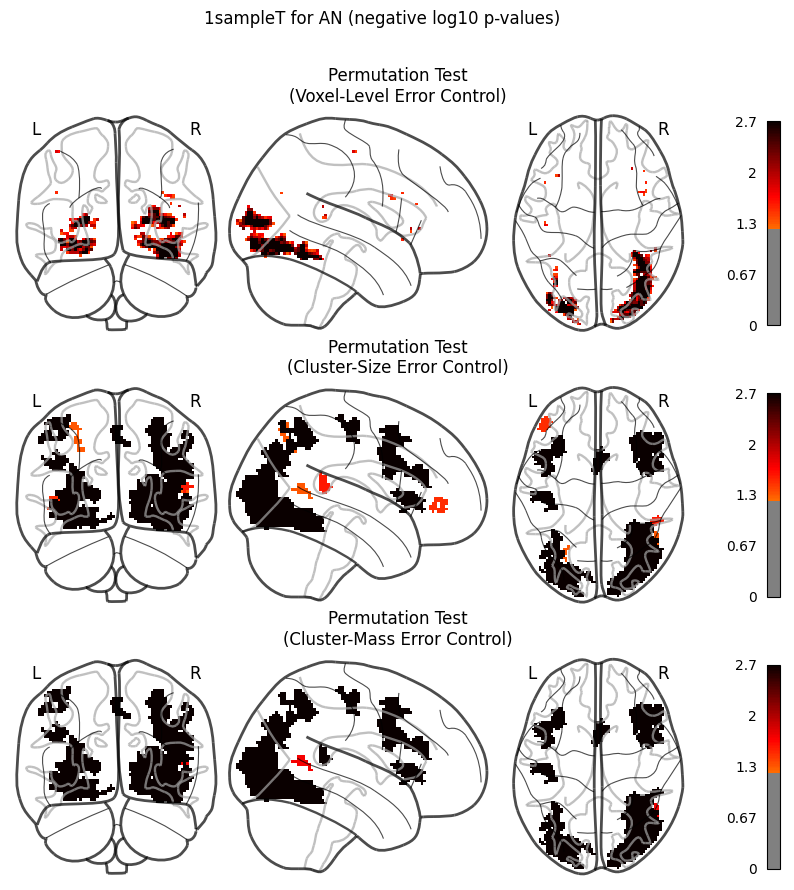

In [7]:
images = [
    an_results['logp_max_t'],
    an_results['logp_max_size'],
    an_results['logp_max_mass'],
]

titles = [
    'Permutation Test\n(Voxel-Level Error Control)',
    'Permutation Test\n(Cluster-Size Error Control)',
    'Permutation Test\n(Cluster-Mass Error Control)',
]
fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)
for index, img in enumerate(images):
    ax = axes[index]
    plotting.plot_glass_brain(
        img,
        colorbar=True,
        plot_abs=False,
        cut_coords=[0],
        threshold=1.3,
        figure=fig,
        axes=ax,

    )
    ax.set_title(titles[index])
fig.suptitle('1sampleT for AN (negative log10 p-values) \n')
plt.show()

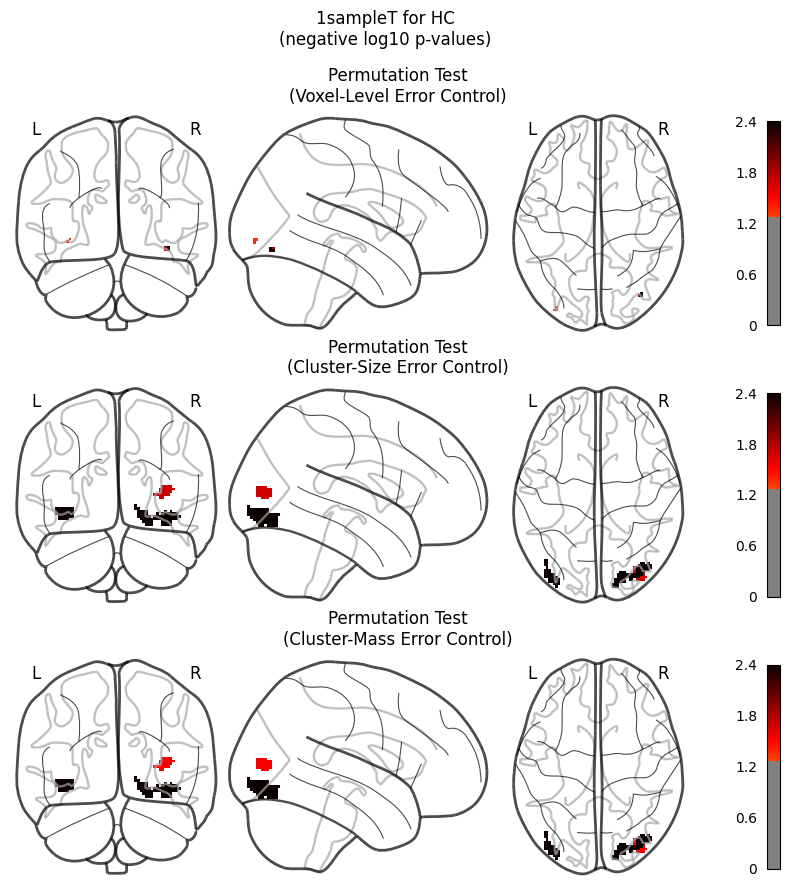

In [8]:
images_hc = [
    hc_results['logp_max_t'],
    hc_results['logp_max_size'],
    hc_results['logp_max_mass'],
]

fig, axes = plt.subplots(figsize=(10, 10), nrows=3, ncols=1)
for index, img in enumerate(images_hc):
    ax = axes[index]
    plotting.plot_glass_brain(
        img,
        colorbar=True,
        plot_abs=False,
        cut_coords=[0],
        threshold=1.3,
        figure=fig,
        axes=ax,

    )
    ax.set_title(titles[index])
fig.suptitle('1sampleT for HC\n(negative log10 p-values)')
plt.show()

In [9]:

an_table = get_clusters_table(an_results['logp_max_t'], stat_threshold=0.0,
                           cluster_threshold=0.0).set_index('Cluster ID', drop=True)
an_table.head()

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


,X,Y,Z,Peak Stat,Cluster Size (mm3)
Cluster ID,,,,,
1,29.5,-92.5,11.5,2.699838,18088
1a,31.5,-76.5,-16.5,2.699838,
1b,37.5,-72.5,-12.5,2.699838,
1c,29.5,-80.5,-14.5,2.699838,
2,-28.5,-92.5,-12.5,2.699838,9312


In [27]:
l = {img: get_clusters_table(an_results[img], stat_threshold=0.0,
                           cluster_threshold=10.0) for img in an_results }

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(
/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster 

In [35]:
for df in l:
    if 'log' in df:
        l[df]['pval'] = 10 ** -l[df]['Peak Stat']

In [40]:
l['logp_max_t']

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3),pval
0,1,29.5,-92.5,11.5,2.699838,18088,0.001996
1,1a,31.5,-76.5,-16.5,2.699838,,0.001996
2,1b,37.5,-72.5,-12.5,2.699838,,0.001996
3,1c,29.5,-80.5,-14.5,2.699838,,0.001996
4,2,-28.5,-92.5,-12.5,2.699838,9312,0.001996
5,2a,-22.5,-88.5,-8.5,2.699838,,0.001996
6,2b,-22.5,-82.5,-16.5,2.699838,,0.001996
7,2c,-32.5,-90.5,-8.5,2.699838,,0.001996
8,3,45.5,-40.5,17.5,2.000868,456,0.009980
9,4,-32.5,23.5,1.5,2.000868,1016,0.009980


In [36]:
p=l['logp_max_t']

In [41]:
g = l['t']

In [ ]:
new = pd.merge(l['logp_max_t'], l['t'], how='left', left_on=['X','Y','Z'], right_on=['X','Y','Z'])

In [16]:
an_table['pval'] = 10 ** -an_table['Peak Stat']

In [17]:
an_table_val = get_clusters_table(an_results['mass'], stat_threshold=0.0,
                           cluster_threshold=0.0).set_index('Cluster ID', drop=True)
an_table_val.head()

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


,X,Y,Z,Peak Stat,Cluster Size (mm3)
Cluster ID,,,,,
1,31.5,-76.5,-4.5,3759.588591,18904
2,-32.5,-84.5,-0.5,1690.812964,10064
3,45.5,17.5,27.5,441.611103,5280
4,29.5,-64.5,41.5,353.009479,5232
5,35.5,21.5,1.5,116.668678,1592


In [18]:
hc_table = get_clusters_table(an_results['logp_max_mass'], stat_threshold=0.0,
                           cluster_threshold=0.0).set_index('Cluster ID', drop=True)
hc_table.head()

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:103: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body. Identifying the nearest in-cluster voxel.
  warnings.warn(


,X,Y,Z,Peak Stat,Cluster Size (mm3)
Cluster ID,,,,,
1,35.5,21.5,1.5,2.698970,1289176
1a,29.5,-64.5,41.5,2.698970,
1b,-44.5,-20.5,55.5,2.698970,
1c,45.5,17.5,27.5,2.698970,
2,-18.5,-78.5,-24.5,0.000869,8
